In [3]:
import sys
import os
import json
from pprint import pprint
import glob
import numpy as np
import pandas as pd
from statistics import mean

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
import matplotlib

matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.dpi']= 200
matplotlib.rcParams['figure.figsize']= (10, 8)

import matplotlib.gridspec as gridspec

In [5]:
import csv

In [27]:
exposure_trigger = []
exposure_GPIO = []
exposure_t_exp = []
any_trigger = []
any_GPIO = []
any_t_exp = []
clock_ticks_per_second = 1000000

with open("trigger_data/exposureActive.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        if row[0] != "GPIO Output":
            exposure_GPIO.append(int(row[0]))
            exposure_trigger.append(int(row[1]))
            exposure_t_exp.append(int(row[2]))
        else:
            print(row[3])
with open("trigger_data/anyPixel.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        if row[0] != "GPIO Output":
            any_GPIO.append(int(row[0]))
            any_trigger.append(int(row[1]))
            any_t_exp.append(int(row[2]))
        

 clock ticks per second=1000000


In [28]:
exposure_clock_delay = []
any_clock_delay = []
exposure_t_delay = []
any_t_delay = []

for i in range(len(exposure_trigger)):
    exposure_clock_delay.append(exposure_GPIO[i] - exposure_trigger[i])
for i in range(len(any_trigger)):
    any_clock_delay.append(any_GPIO[i] - any_trigger[i])
    
print(exposure_clock_delay)

[308030, 308815, 304717, 306160, 310249, 309649, 309677, 308973, 309198, 308468, 308305, 309303, 306959, 303015, 304607, 308697, 309345, 308874, 309237, 306184, 306816, 309052, 309384, 306889, 306900, 308988, 309271, 309530, 308850, 309878, 308712, 305184, 303967, 306428, 309630, 309357, 305975, 306299, 300338, 307894, 308418, 308720, 303777, 308565, 309687, 306182, 307154, 308684, 303960, 302615, 307793, 308358, 308759, 307231, 308480, 309680, 309283, 309524, 308975, 299031, 309483, 307036, 302875, 306635, 308499, 308652, 309234, 308374, 306356, 308427, 308164, 307900, 304667, 307436, 309323, 302073, 308736, 309006, 308753, 308324, 308962, 309017, 308016, 309665, 308752, 303930, 308849, 309708, 308967, 306465, 307583, 307994, 309488, 308987, 300627, 308267, 300001, 309117, 305679, 305010]


In [29]:
for ticks in exposure_clock_delay:
    exposure_t_delay.append(ticks / clock_ticks_per_second)
for ticks in any_clock_delay:
    any_t_delay.append(ticks / clock_ticks_per_second)

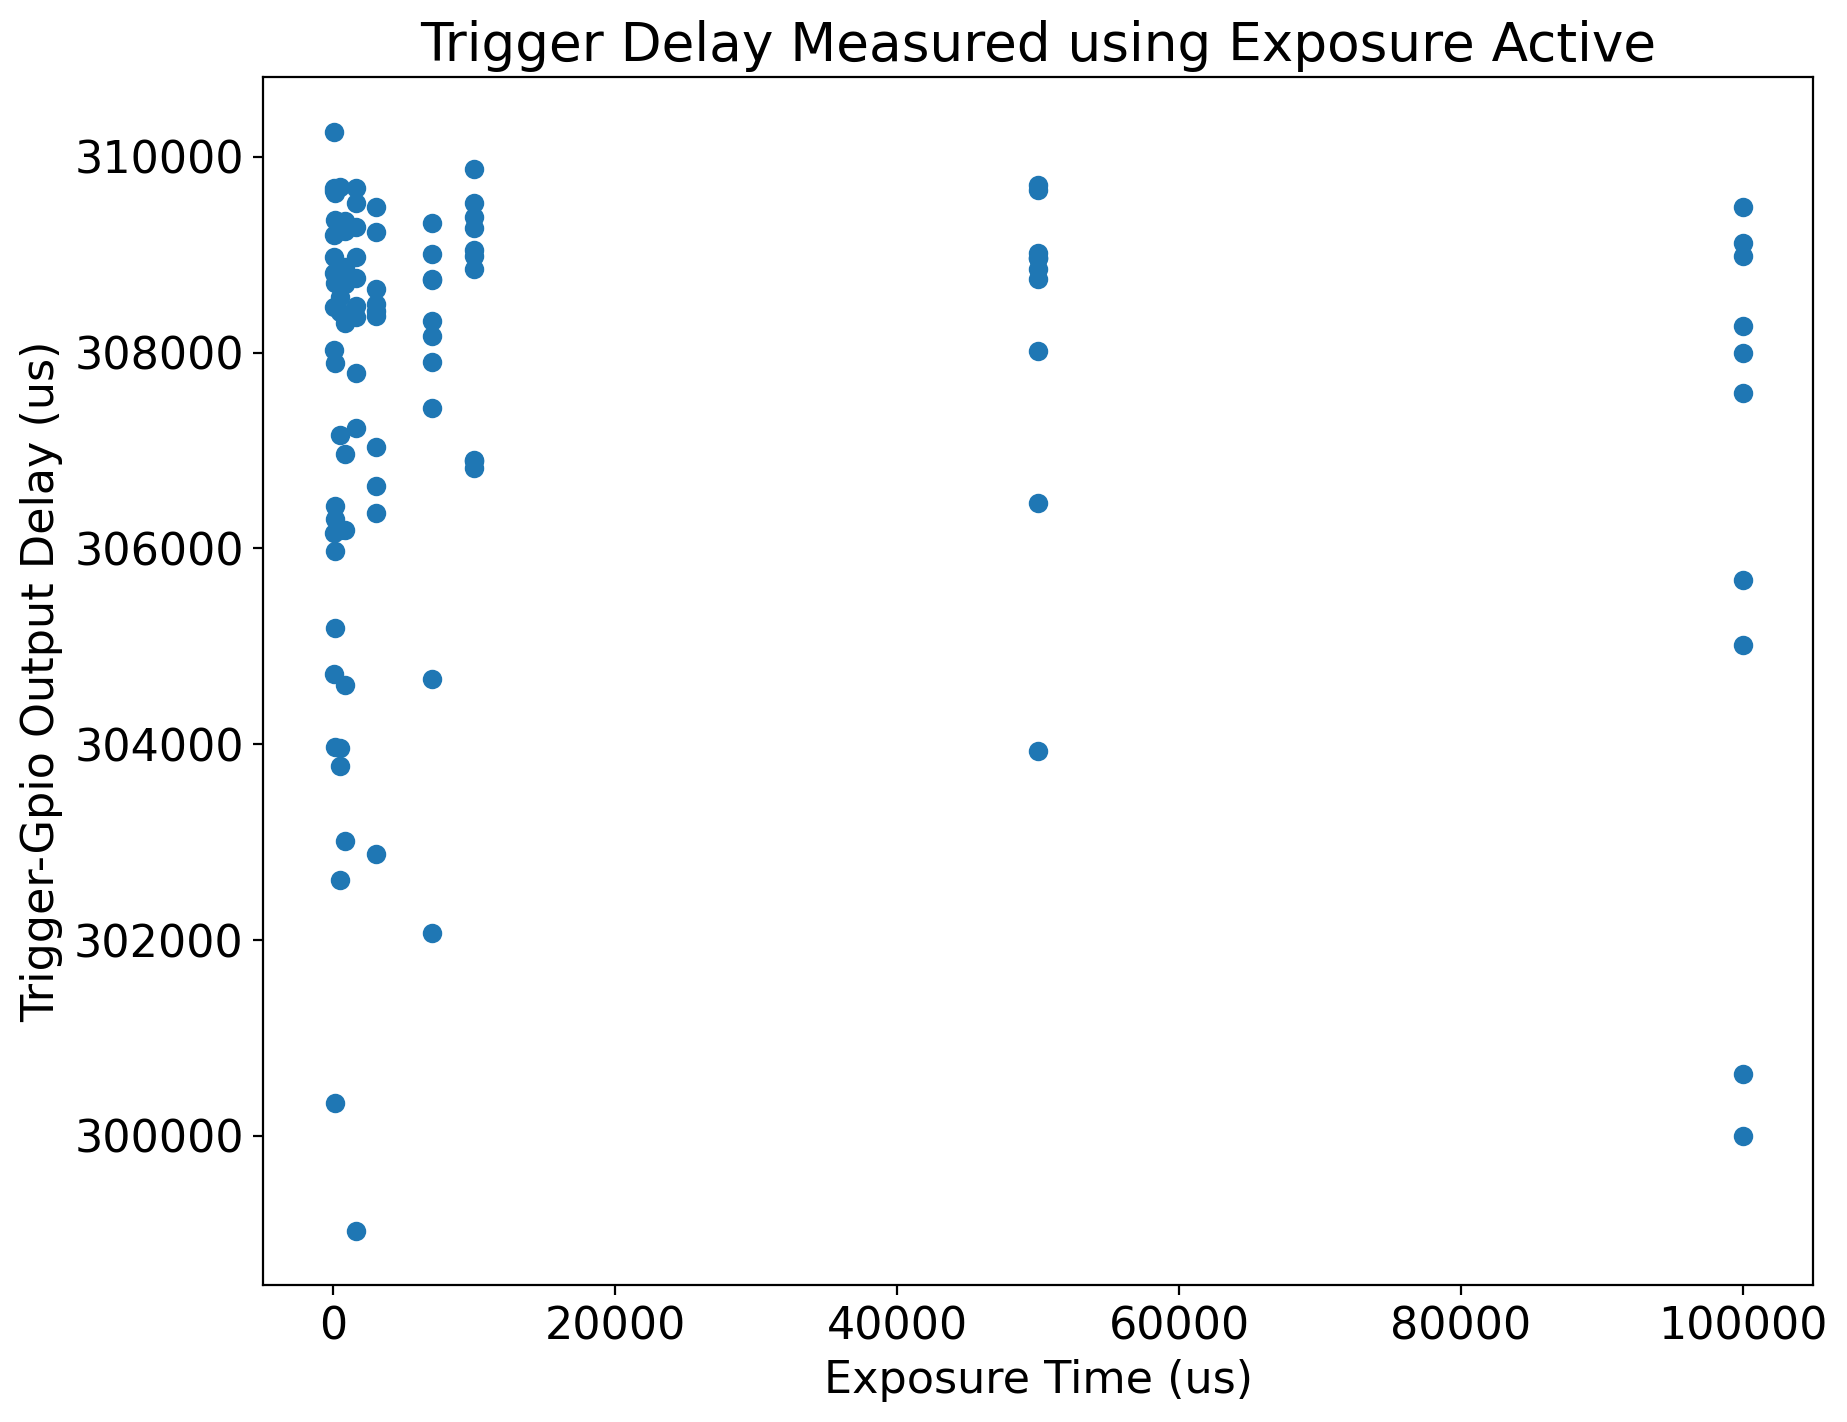

In [30]:
plt.scatter(exposure_t_exp, exposure_clock_delay)
plt.xlabel("Exposure Time (us)")
plt.ylabel("Trigger-Gpio Output Delay (us)")
plt.title("Trigger Delay Measured using Exposure Active")
plt.show()

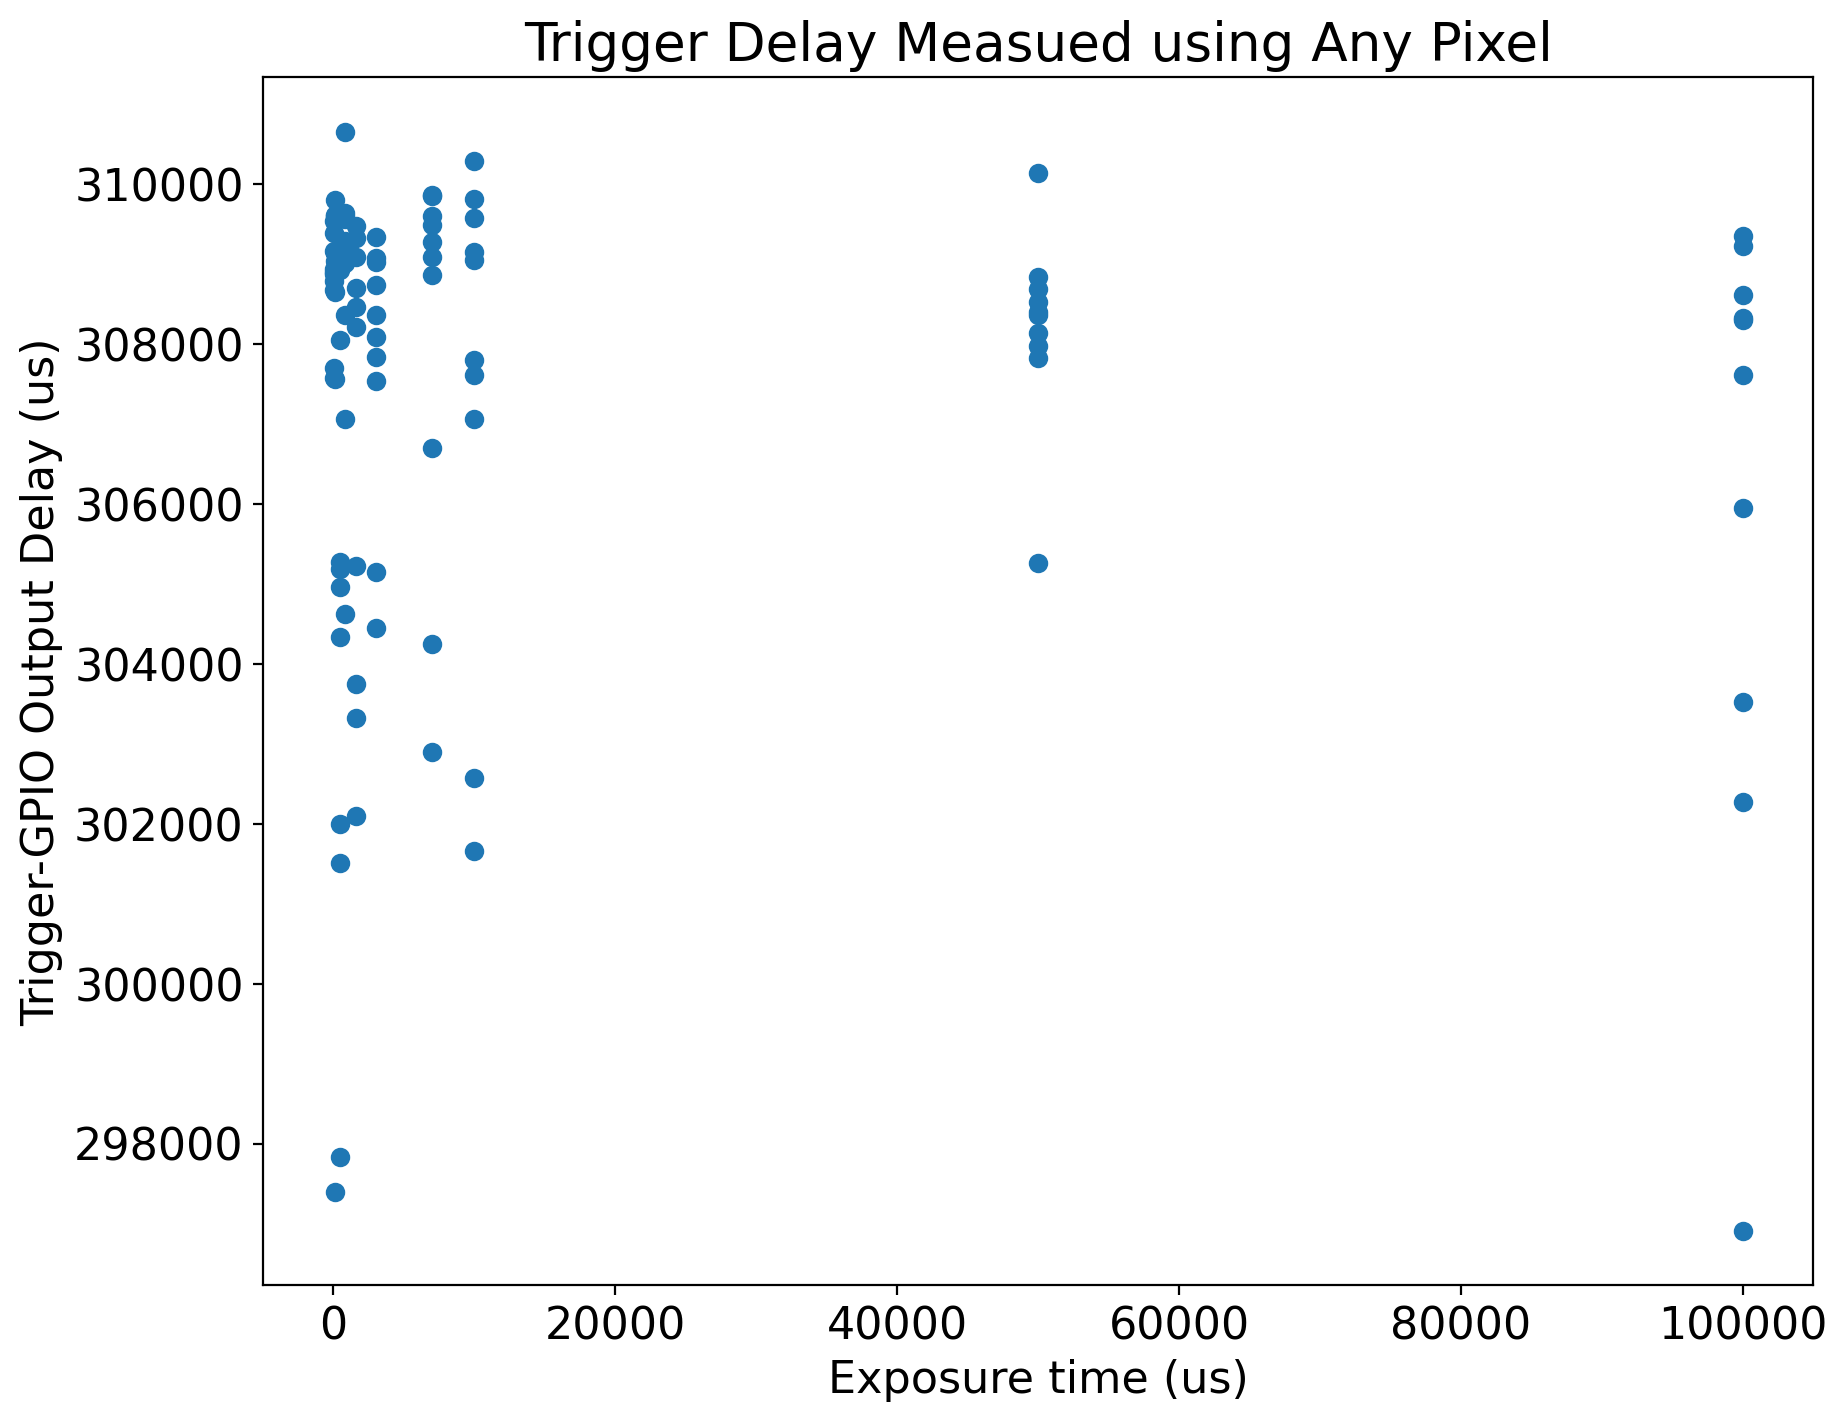

In [31]:
plt.scatter(any_t_exp, any_clock_delay)
plt.xlabel("Exposure time (us)")
plt.ylabel("Trigger-GPIO Output Delay (us)")
plt.title("Trigger Delay Measured using Any Pixel")
plt.show()